In [86]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import plotly

In [87]:
shot_profile = pd.read_csv('Shot_Profiles.csv', index_col = 'Players')

In [88]:
new_df = pd.read_csv('2000-2020_shot_charts.csv')

In [89]:
new_df['player_by_year'] = [new_df.PLAYER_NAME[i] + ' ' + new_df.GAME_DATE[i][0:4] 
                            for i in range(len(new_df['PLAYER_NAME']))]

In [92]:
new_df.columns

Index(['GAME_DATE', 'GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID',
       'PLAYER_NAME', 'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
       'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'HTM', 'VTM',
       'player_by_year'],
      dtype='object')

In [95]:
shot_profile

,PLAYER_ID,left_corner_3,right_corner_3,left_wing_3,right_wing_3,center_3,deep_3,heave,left_baseline_deep_2,right_baseline_deep_2,...,right_wing_deep_2,left_baseline_short_2,right_baseline_short_2,left_wing_short_2,right_wing_short_2,deep_center_2,short_center_2,floater_range,in_the_paint,restricted_area
Players,,,,,,,,,,,,,,,,,,,,,
A.C. Green 1999,920.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,4.0,...,0.0,4.0,1.0,3.0,4.0,NaN,3.0,4.0,5.0,36.0
A.C. Green 2000,920.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,...,0.0,3.0,7.0,6.0,2.0,NaN,12.0,7.0,7.0,38.0
A.J. Bramlett 1999,1920.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,4.0
A.J. Guyton 2000,2062.0,2.0,1.0,1.0,3.0,0.0,0.0,0.0,4.0,1.0,...,1.0,2.0,2.0,1.0,0.0,NaN,2.0,0.0,3.0,1.0
A.J. Guyton 2001,2062.0,3.0,2.0,6.0,14.0,4.0,0.0,0.0,5.0,3.0,...,1.0,0.0,2.0,1.0,3.0,NaN,3.0,1.0,2.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zydrunas Ilgauskas 2008,980.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,47.0,31.0,...,2.0,18.0,14.0,7.0,3.0,1.0,21.0,8.0,34.0,187.0
Zydrunas Ilgauskas 2009,980.0,2.0,9.0,1.0,0.0,0.0,0.0,0.0,48.0,21.0,...,9.0,4.0,9.0,7.0,7.0,1.0,13.0,7.0,22.0,107.0
Zydrunas Ilgauskas 2010,980.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,8.0,1.0,...,3.0,1.0,1.0,1.0,2.0,1.0,4.0,4.0,10.0,37.0


In [7]:
features = shot_profile.drop(columns = 'PLAYER_ID')

## Plotting the quantity different types of shots in the dataframe (in depth)

[Text(0, 0, '0'),
 Text(0, 0, '50000'),
 Text(0, 0, '100000'),
 Text(0, 0, '150000'),
 Text(0, 0, '200000'),
 Text(0, 0, '250000')]

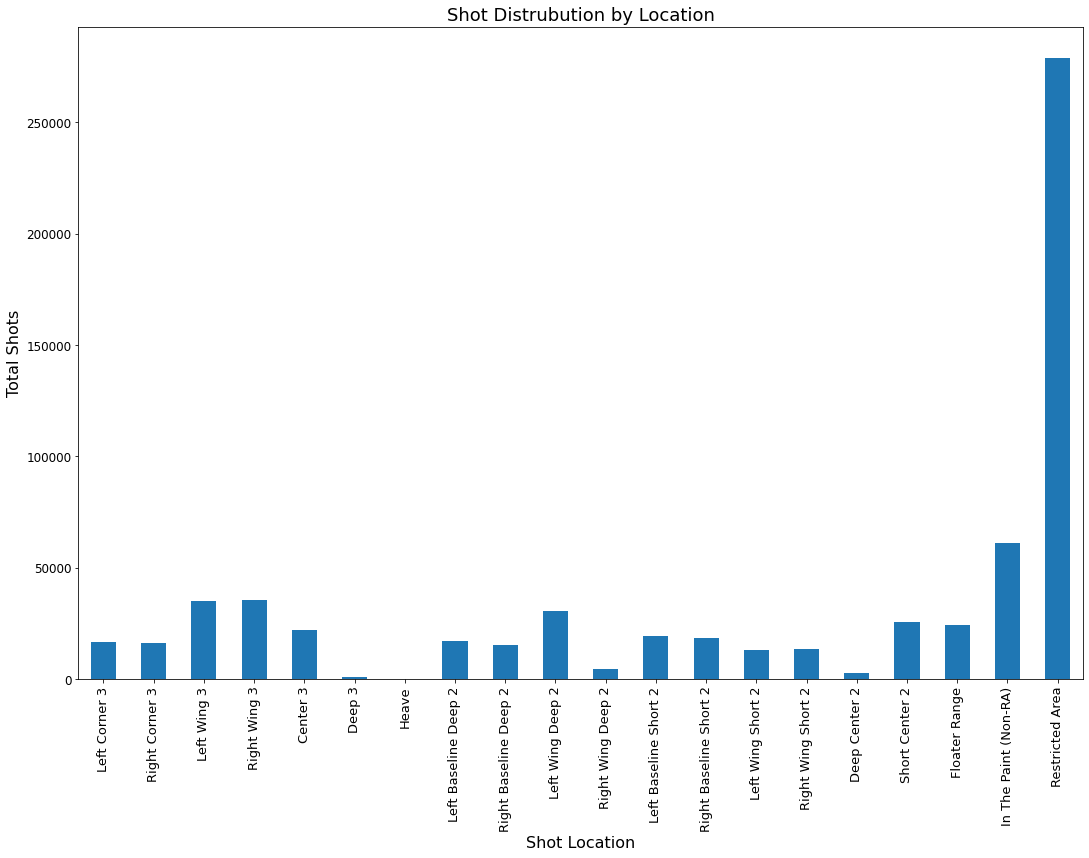

In [85]:
ax = features.sum().plot.bar(figsize = (18,12))

ax.set_title('Shot Distrubution by Location', fontdict = {'fontsize' : 18})
ax.set_ylabel('Total Shots', fontdict = {'fontsize' : 16})
ax.set_xlabel('Shot Location', fontdict = {'fontsize' : 16})
ax.set_xticklabels(['Left Corner 3', 'Right Corner 3', 'Left Wing 3', 'Right Wing 3', 'Center 3',
'Deep 3', 'Heave', 'Left Baseline Deep 2', 'Right Baseline Deep 2', 'Left Wing Deep 2', 
'Right Wing Deep 2', 'Left Baseline Short 2', 'Right Baseline Short 2', 'Left Wing Short 2',
'Right Wing Short 2', 'Deep Center 2', 'Short Center 2', 'Floater Range', 
'In The Paint (Non-RA)', 'Restricted Area'], fontdict = {'fontsize' : 13})
ax.set_yticklabels([0, 50000, 100000, 150000, 200000, 250000], fontdict = {'fontsize' : 12})


## Plotting the quantity different types of shots in the dataframe (general)

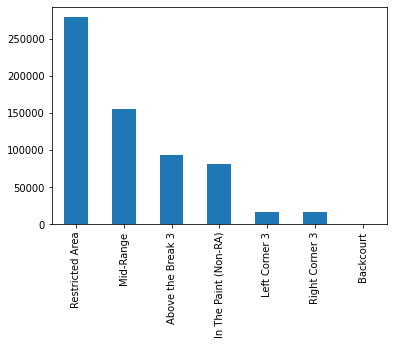

In [10]:
new_df.SHOT_ZONE_BASIC.value_counts().plot.bar()

## plotting change in shooting styles over time

In [90]:
new_df['GAME_DATE'] = pd.to_datetime(new_df['GAME_DATE'], format = '%Y-%m-%d')

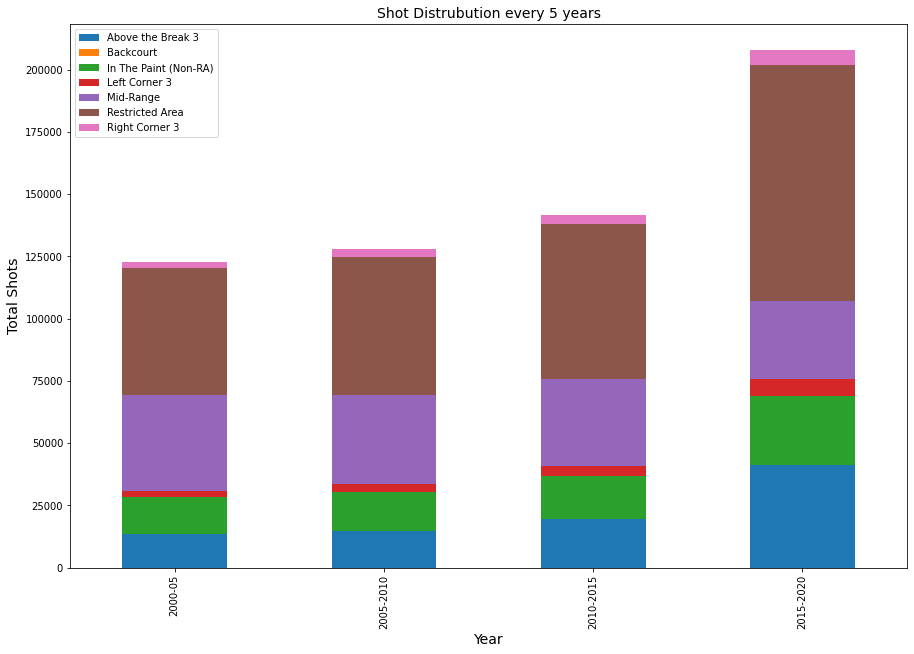

In [91]:
ax3 = new_df.groupby(new_df.GAME_DATE.dt.year.sub(2001)//5)['SHOT_ZONE_BASIC'].value_counts().unstack()[1:].plot.bar(stacked = True, figsize = (15, 10))
                                                                                                                    
ax3.set_title('Shot Distrubution every 5 years', fontdict = {'fontsize' : 14})
ax3.set_ylabel('Total Shots', fontdict = {'fontsize' : 14})
ax3.set_xlabel('Year', fontdict = {'fontsize' : 14})
ax3.set_xticklabels(['2000-05', '2005-2010', '2010-2015', '2015-2020'], fontdict = {'fontsize' : 10})
ax3.legend()

